# Analiza YouTube trendova

   Platforma YouTube, s kojom smo vjerojatno svi dobro poznati (pogotovo kada treba naučiti puno toga u malo vremena), vodi dnevnu evidenciju o videima na Trending Page-u. Kako YouTube odlučuje koji videi će biti taj dan na Tranding Page-u? Sigurno postoji kompleksan algoritam na koji utječe mnogo faktora.

Mi ćemo u ovom eseju proučavati moguće korelacije između broja view-ova, like-ova, dislike-ova i broja komentara na videima koji su bili na Tranding Page-u. Također, bavit ćemo se proučavanjem početcima jednih od najvećih neslužbenih *natjecanja* na YouTube-u, PewDiePie vs. T-Series. Dva velika kanala koja su se borila za prvo mjesto po broju pretplatnika, no više o ovoj zanimljivoj *borbi* nešto kasnije.

Trending Page se razlikuje od države do države. U nastavku ćemo učitati i analizirati podatke iz Velike Britanije (GB), Indije (IN) i Francuske (FR). Podaci su iz 2017. i 2018. godine.

In [1]:
import pandas as pd
podaciGB = pd.read_csv('GBvideos.csv', encoding = 'utf-8')
podaciGB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [2]:
podaciIN = pd.read_csv('INvideos.csv', encoding = 'utf-8')
podaciIN.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [3]:
podaciFR = pd.read_csv('FRvideos.csv', encoding = 'utf-8')
podaciFR.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


Vidimo po ulaznim podacima da se videi razlikuju od države do države. Odmah uočavamo da bi lako mogli zaključiti o kojoj se državi radi s obzirom na `title` videa.

## (Ne)zavisnost broja pregleda i broja lajkova

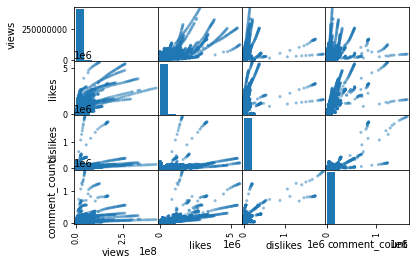

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(podaciGB[['views','likes','dislikes', 'comment_count']])
plt.show()

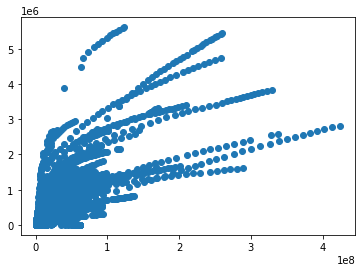

In [5]:
import matplotlib.pyplot as plt
plt.plot(podaciGB['views'],podaciGB['likes'], 'o')

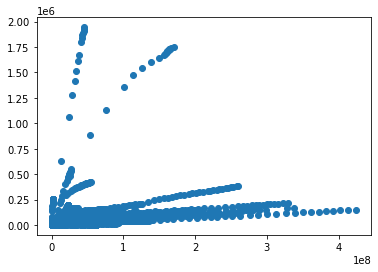

In [6]:
plt.plot(podaciGB['views'],podaciGB['dislikes'], 'o')

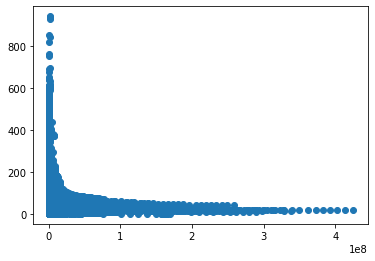

In [7]:
plt.plot(podaciGB['views'],podaciGB['likes']/podaciGB['dislikes'], 'o')

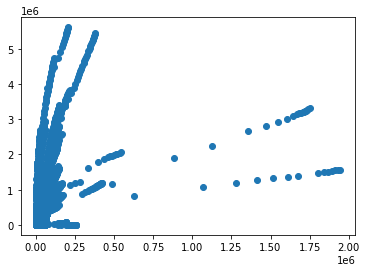

In [8]:
plt.plot(podaciGB['dislikes'],podaciGB['likes'], 'o')

## Frekvencije kategorija u pojedinoj državi

43 1


<AxesSubplot:ylabel='Frequency'>

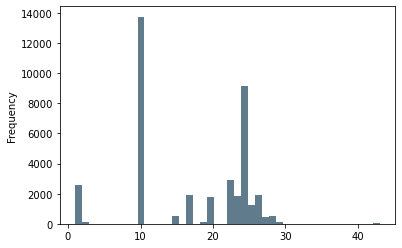

In [10]:
print(max(podaciGB['category_id']),min(podaciGB['category_id']))
podaciGB['category_id'].plot.hist(bins=44, rwidth=1,color='#607c8c')

<AxesSubplot:ylabel='Frequency'>

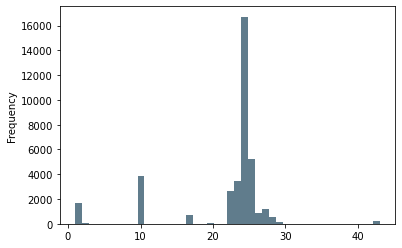

In [11]:
podaciIN['category_id'].plot.hist(bins=44, rwidth=1,color='#607c8c')

<AxesSubplot:ylabel='Frequency'>

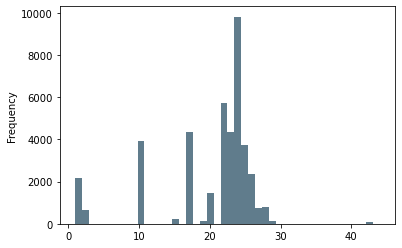

In [12]:
podaciFR['category_id'].plot.hist(bins=44, rwidth=1,color='#607c8c')

## PewDiePie vs. T-Series

In [13]:
print(sum(podaciGB['channel_title']=='PewDiePie'))
print(sum(podaciGB['channel_title']=='T-Series'))

152
0


In [14]:
print(sum(podaciIN['channel_title']=='PewDiePie'))
print(sum(podaciIN['channel_title']=='T-Series'))

85
221


In [15]:
print(sum(podaciFR['channel_title']=='PewDiePie'))
print(sum(podaciFR['channel_title']=='T-Series'))

71
7


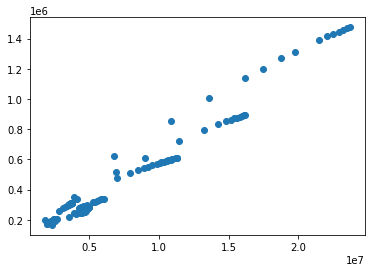

In [23]:
import numpy as np
podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
xGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
yGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','likes']
plt.plot(xGB, yGB, 'o')

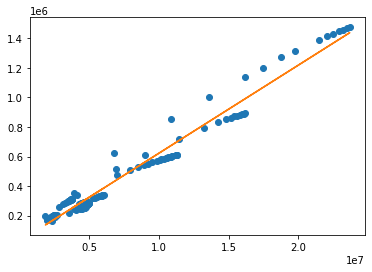

In [24]:
plt.plot(xGB, yGB, 'o')
kGB, lGB= np.polyfit(xGB, yGB, 1)
plt.plot(xGB, kGB*xGB + lGB)

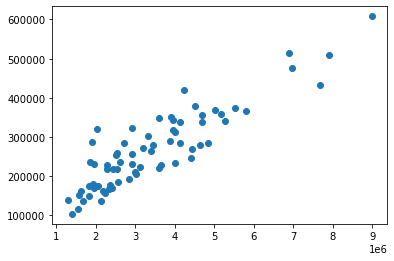

In [25]:
podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
xFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
yFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','likes']
plt.plot(xFR,yFR, 'o')

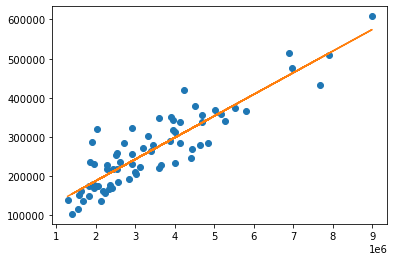

In [26]:
plt.plot(xFR, yFR, 'o')
kFR, lFR= np.polyfit(xFR, yFR, 1)
plt.plot(xFR, kFR*xFR + lFR)

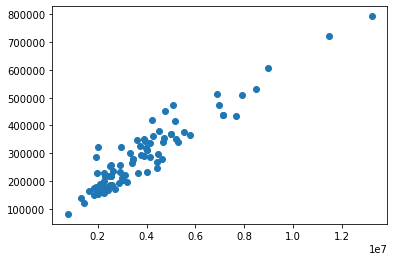

In [27]:
podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
xIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
yIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','likes']
plt.plot(xIN,yIN, 'o')

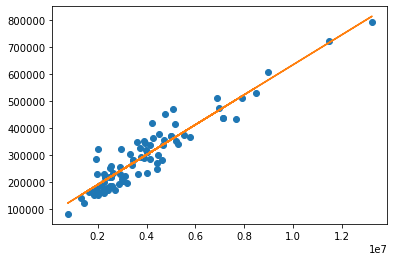

In [28]:
plt.plot(xIN, yIN, 'o')
kIN, lIN= np.polyfit(xIN, yIN, 1)
plt.plot(xIN, kIN*xIN + lIN)

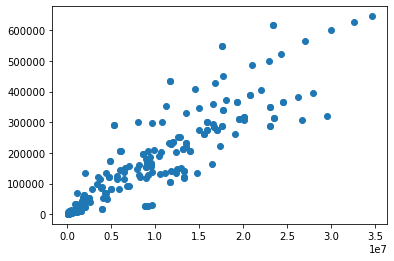

In [29]:
podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
x = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
y = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','likes']
plt.plot(x,y, 'o')

# Literatura

https://www.kaggle.com/datasnaek/youtube-new